[View in Colaboratory](https://colab.research.google.com/github/krupagaliya/basic_ml_projects/blob/master/basic_DL.ipynb)

**This Notebook has practising of implementation of basic Deel Learning algorithm with keras**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
from sklearn.datasets import make_moons

In [0]:
X, Y = make_moons(n_samples=1000,noise=0.1)

In [0]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# shallow model

In [0]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=100, verbose=0) #training

In [0]:
results = model.evaluate(x_test, y_test)
results[1] #it's accuracy

 64/300 [=====>........................] - ETA: 1s

0.88

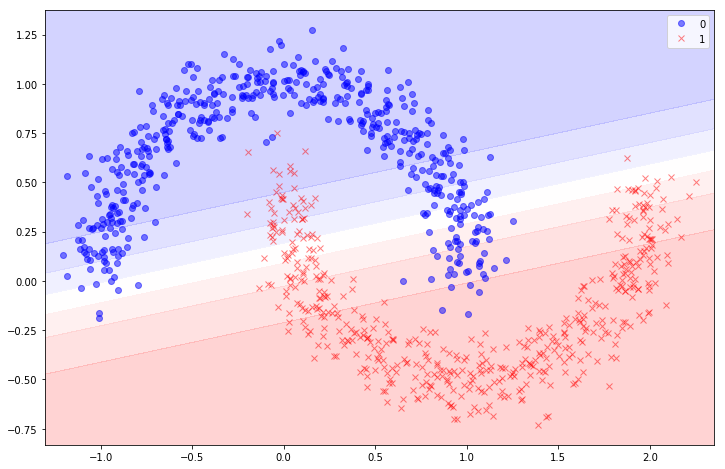

In [0]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, Y)

# -Deep model

In [0]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh')) #First layer #input units=2  #Output_units = 4 
model.add(Dense(3,activation='tanh'))            #Second layer     #output_units = 3
model.add(Dense(1,activation='sigmoid'))        #third layer    #output_units = 1 (Sigmoid) classification  

model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=200,verbose=0)

In [0]:
result = model.evaluate(x_test,y_test)
result[1]

 32/300 [==>...........................] - ETA: 0s

1.0

In [0]:
# output tensor
print(model.layers[0].output)
print(model.layers[0].weights)

Tensor("dense_15/Sigmoid:0", shape=(?, 1), dtype=float32)
[<tf.Variable 'dense_15/kernel:0' shape=(2, 1) dtype=float32_ref>, <tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32_ref>]


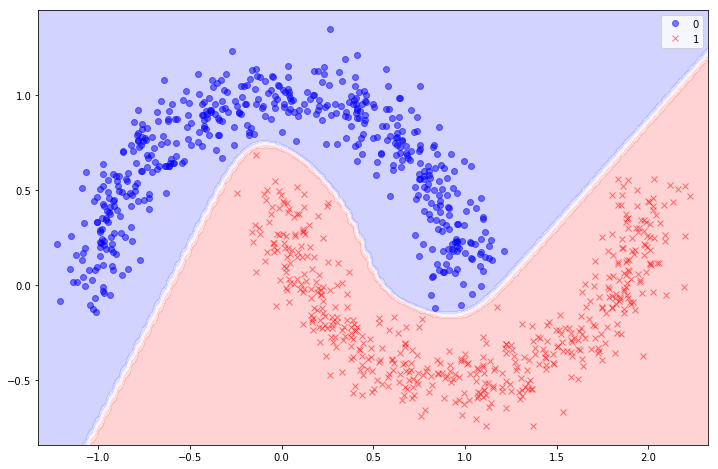

In [0]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, Y)

# Multiclass classification

In [0]:
df = pd.read_csv('../../material_github/data/iris.csv')

In [0]:
df.head()
        #4 features so 4 input units
              # 3 input units

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values

In [0]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
target_dict  ={n:i for i,n in enumerate(target_names)}
target_dict       #convert in dictonary

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [0]:
# convert all 'species' in 0 1 2 
Y = df['species'].map(target_dict) 

In [0]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [0]:
#finally all in form of matric np array 
#where      1-First class                  2-second class               3-Third class
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(Y) #y_cat is numpy array
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.2)
#x_train.shape

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s - loss: 4.3026 - acc: 0.3796 - val_loss: 1.7841 - val_acc: 0.6667
Epoch 2/20
108/108 [==============================] - 0s - loss: 2.0694 - acc: 0.6481 - val_loss: 4.0104 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s - loss: 2.1133 - acc: 0.6852 - val_loss: 0.8332 - val_acc: 0.6667
Epoch 4/20
108/108 [==============================] - 0s - loss: 1.0240 - acc: 0.6667 - val_loss: 0.6996 - val_acc: 0.5833
Epoch 5/20
108/108 [==============================] - 0s - loss: 0.9334 - acc: 0.6667 - val_loss: 0.9681 - val_acc: 0.5833
Epoch 6/20
108/108 [==============================] - 0s - loss: 0.4659 - acc: 0.7778 - val_loss: 0.5390 - val_acc: 0.6667
Epoch 7/20
108/108 [==============================] - 0s - loss: 0.4080 - acc: 0.7407 - val_loss: 0.6712 - val_acc: 0.5833
Epoch 8/20
108/108 [==============================] - 0s - loss: 0.3485 - acc: 0.7963 - val_lo

In [0]:
y_pred  = model.predict(x_test)
y_pred[:5]

array([[2.2492019e-02, 9.6520287e-01, 1.2305144e-02],
       [4.9589545e-07, 9.2882931e-02, 9.0711659e-01],
       [9.8866373e-01, 1.1335966e-02, 3.6792397e-07],
       [2.8381723e-03, 9.0547144e-01, 9.1690332e-02],
       [5.5260694e-04, 8.1753135e-01, 1.8191609e-01]], dtype=float32)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(y_test_class)
y_pred_class


[1 2 0 1 1 1 1 0 2 0 1 0 2 1 1 2 2 1 2 0 2 0 0 2 2 0 1 2 0 1]


array([1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0,
       0, 2, 2, 0, 1, 2, 0, 1])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test_class, y_pred_class)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]])